# Final project
# Inspection of the Chicago Marathon Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline
pd.set_option('display.max_columns',60)

Open the data

In [2]:
# open the chicago Marathon data
rdata = pd.read_csv('MarathonResults2016.csv')
rdata.pop('Unnamed: 0')
rdata.head()

,Place Overall,Place Gender,Place Division,Name (CTZ),"City, State",BIB,Division,Age,HALF,Finish,Gender,start_time,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal
0,1,1,1.0,"» Kirui, Abel (KEN)",NaN,3,30-34,34.0,01:06:51,02:11:23,Male,07:30:03,967.0,1924.0,2863.0,3788.0,4011.0,4724.0,5697.0,6611.0,7496.0,7883
1,2,2,1.0,"» Chumba, Dickson (KEN)",NaN,1,25-29,29.0,01:06:51,02:11:26,Male,07:30:03,967.0,1924.0,2863.0,3789.0,4011.0,4724.0,5698.0,6611.0,7496.0,7886
2,3,3,1.0,"» Kipketer, Gideon (KEN)",NaN,7,20-24,23.0,01:06:51,02:12:20,Male,07:30:03,967.0,1924.0,2862.0,3787.0,4011.0,4724.0,5697.0,6611.0,7520.0,7940
3,4,4,2.0,"» Lonyangata, Paul (KEN)",NaN,6,20-24,24.0,01:06:51,02:13:17,Male,07:30:03,967.0,1924.0,2863.0,3789.0,4011.0,4724.0,5698.0,6612.0,7576.0,7997
4,5,5,2.0,"» Sambu, Stephen (KEN)",NaN,8,25-29,28.0,01:06:51,02:13:35,Male,07:30:03,968.0,1929.0,2864.0,3789.0,4011.0,4731.0,5699.0,6635.0,7596.0,8015


convert the time into minutes, and get the minutes per mile, and the speed (miles per hour) for each runner

In [3]:
def get_mins(x):
    return x/60.

In [4]:
# convert time from seconds to minutes
t_data = ['t05k','t10k','t15k','t20k','tHalf','t25k','t30k','t35k','t40k','tFinal']
for elem in t_data:
    rdata[elem] = get_mins(rdata[elem])

mphXX = miles per hour, for every split
mkXX = minutes per mile, for every split

In [5]:
mph_data = ['mph05','mph10','mph15','mph20','mphHalf','mph25','mph30','mph35','mph40','mphFinal']
pace_data = ['pa05','pa10','pa15','pa20','paHalf','pa25','pa30','pa35','pa40','paFinal']
split = [5,10,15,20,21.1, 25,30,35,40,42.2] # distance in km
#get the speed in miles per hour, given the split in km and time in minutes
def get_speed(split, time):
    miles = split/1.60934  #distance in km
    hours = time/60.
    mph = miles/hours
    return miles/hours

# get the pace, with distance in km and time in min, return the pace in minutes per miles
def get_pace(distance, time):
    dist = distance/1.60934 #dist in km
    pace = time/dist
    return pace

In [6]:
# get the speed in miles per hour
for i in range(10):
    if i ==0:
        rdata[mph_data[i]]=get_speed(split[i], rdata[t_data[i]])
    else:
        rdata[mph_data[i]]=get_speed(split[i]-split[i-1], rdata[t_data[i]]-rdata[t_data[i-1]])

In [7]:
# get the minutes per split, minutes per mils
for i in range(10):
    if i==0:
        rdata[pace_data[i]] = get_pace(split[i],rdata[t_data[i]])
    else:
        rdata[pace_data[i]] = get_pace(split[i]-split[i-1],rdata[t_data[i]]-rdata[t_data[i-1]])

In [8]:
#get the time difference between different splits. 
tdiff = ['td05','td10','td15','td20','tdHalf','td25','td30','td35','td40','tdFinal']
for i in range(10):
    if i==0:
        rdata[tdiff[i]] = rdata[t_data[i]]
    else:
        rdata[tdiff[i]] = rdata[t_data[i]]-rdata[t_data[i-1]]

In [10]:
rdata.describe()

,Place Overall,Place Gender,Place Division,BIB,Age,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal,mph05,mph10,mph15,mph20,mphHalf,mph25,mph30,mph35,mph40,mphFinal,pa05,pa10,pa15,pa20,paHalf,pa25,pa30,pa35,pa40,paFinal,td05,td10,td15,td20,tdHalf,td25,td30,td35,td40,tdFinal
count,40547.00000,40547.000000,40546.000000,40547.000000,40546.000000,40446.000000,40481.000000,40486.000000,40497.000000,40506.000000,40513.000000,40522.000000,40526.000000,40536.000000,40547.000000,40446.000000,40446.000000,40481.000000,40486.000000,40497.000000,40506.000000,40513.000000,40522.000000,40526.000000,40536.000000,40446.000000,40446.000000,40481.000000,40486.000000,40497.000000,40506.000000,40513.000000,40522.000000,40526.000000,40536.000000,40446.000000,40446.000000,40481.000000,40486.000000,40497.000000,40506.000000,40513.000000,40522.000000,40526.000000,40536.000000
mean,20273.99783,10213.340592,1367.037266,27365.277678,38.348271,29.768062,60.197485,90.274920,121.625311,128.635978,154.329852,187.576210,222.792152,259.901692,274.778491,6.453819,6.360467,6.412694,6.207925,6.150371,5.965259,5.931241,5.601901,5.336903,5.846507,9.581387,9.790553,9.680903,10.085098,10.242102,10.599300,10.692694,11.333509,11.935433,10.856618,29.768062,30.417914,30.077245,31.333023,7.000579,25.685854,33.220743,35.211668,37.081764,14.841215
std,11705.05530,5982.388734,954.568054,16281.440360,10.592641,5.357087,11.183003,16.691988,23.070045,24.595581,30.338132,37.835934,45.478079,53.696473,57.073611,1.123284,1.214364,1.178416,1.281670,1.319951,1.331726,1.452347,1.342160,1.309488,1.668484,1.724275,1.945108,1.833649,2.211656,2.497230,2.548913,2.608292,2.731163,3.029140,3.684768,5.357087,6.043184,5.696899,6.871312,1.706882,6.176917,8.103609,8.485351,9.411126,5.037152
min,1.00000,1.000000,1.000000,1.000000,16.000000,16.100000,32.066667,47.700000,63.116667,66.833333,78.733333,94.950000,110.183333,124.933333,131.383333,1.561238,1.561238,1.561456,-4.159431,-10.887770,1.639863,-71.696854,-10.423774,0.551188,-189.279695,5.182075,5.128430,3.610286,-57.700203,-5.900913,4.903673,-0.836857,-5.756073,4.747553,-215.468680,16.100000,15.933333,11.216667,-179.266667,-4.033333,11.883333,-2.600000,-17.883333,14.750000,-294.550000
25%,10137.50000,5069.000000,NaN,12976.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20274.00000,10137.000000,NaN,26876.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268.383333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,30410.50000,15205.500000,NaN,41254.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.575000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,40547.00000,22030.000000,3669.000000,57970.000000,84.000000,119.400000,238.800000,358.183333,292.316667,308.350000,365.383333,438.466667,511.533333,584.616667,587.933333,11.578374,11.699487,16.619182,32.896204,11.773378,12.235727,43.861605,14.413285,12.638090,57.897319,38.431039,38.431039,38.425675,39.836529,120.212821,36.588414,48.221191,42.738706,108.855758,123.541229,119.400000,119.400000,119.383333,123.766667,82.166667,88.666667,149.816667,132.783333,338.200000,168.883333


## Quality cuts
Some runners do not have times at each split, this results in negative miles per hour, 
I will remove data that have null entries, and events where the which had negative speeds, and events where the miles per hour was > 13. 
Not even the fastest runners reach those speeds

In [11]:
#some runners do not have times at each split, resulting in negative miles per hour
# will remove these values. 
rundata = rdata.copy()
for elem in mph_data:
    rundata = rundata[(rundata[elem]>0) & (rundata[elem]<13)&(rundata[elem].notnull())]
for elem in pace_data:
    rundata = rundata[(rundata[elem]>0) & (rundata[elem].notnull())]


In [12]:
rundata.describe()

,Place Overall,Place Gender,Place Division,BIB,Age,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal,mph05,mph10,mph15,mph20,mphHalf,mph25,mph30,mph35,mph40,mphFinal,pa05,pa10,pa15,pa20,paHalf,pa25,pa30,pa35,pa40,paFinal,td05,td10,td15,td20,tdHalf,td25,td30,td35,td40,tdFinal
count,40414.000000,40414.000000,40413.000000,40414.000000,40413.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000,40414.000000
mean,20240.298807,10197.084105,1365.600673,27335.736997,38.331700,29.754265,60.161058,90.226294,121.566480,128.562514,154.236979,187.446413,222.632031,259.673664,274.509975,6.455053,6.361485,6.413456,6.209246,6.152805,5.966954,5.931720,5.604487,5.339512,5.854634,9.576946,9.786974,9.677037,10.087403,10.235451,10.594601,10.689054,11.325125,11.922516,10.853031,29.754265,30.406794,30.065235,31.340187,6.996034,25.674465,33.209434,35.185618,37.041633,14.836310
std,11689.265389,5975.286841,953.462697,16272.375947,10.584222,5.291317,11.032189,16.500586,22.937669,24.435463,30.166833,37.617232,45.229126,53.369273,56.706867,1.121334,1.212965,1.174924,1.269861,1.312974,1.330447,1.375780,1.337235,1.307744,1.323672,1.703106,1.930886,1.816564,2.161132,2.422071,2.542782,2.593102,2.707970,2.951757,3.273302,5.291317,5.999001,5.643816,6.714342,1.655510,6.162061,8.056415,8.413295,9.170707,4.474670
min,1.000000,1.000000,1.000000,1.000000,16.000000,16.100000,32.066667,47.700000,63.116667,66.833333,78.733333,94.950000,110.183333,124.933333,131.383333,1.583115,2.884144,3.102555,1.506155,0.696275,1.639863,1.244266,1.563202,1.285599,0.552269,5.182075,5.128430,4.972861,4.956767,5.096243,4.903673,5.021141,4.897758,4.747553,4.718292,16.100000,15.933333,15.450000,15.400000,3.483333,11.883333,15.600000,15.216667,14.750000,6.450000
25%,10119.250000,5059.250000,NaN,12952.250000,NaN,26.150000,52.383333,78.583333,105.266667,111.150000,132.550000,160.083333,189.354167,220.066667,232.683333,5.666013,5.520587,5.603562,5.313401,5.224280,5.005206,4.901275,4.555890,4.331801,4.911449,8.416848,8.438306,8.411484,8.546937,8.583147,8.768840,8.754810,9.221518,9.688227,8.948906,26.150000,26.216667,26.133333,26.554167,5.866667,21.250000,27.200000,28.650000,30.100000,12.233333
50%,20232.500000,10117.500000,NaN,26701.000000,NaN,29.400000,59.116667,88.591667,119.041667,125.800000,150.650000,183.083333,217.600000,253.866667,268.266667,6.340538,6.294153,6.336946,6.145445,6.090683,5.902621,5.840579,5.471971,5.173316,5.742441,9.462919,9.532657,9.468284,9.763329,9.851112,10.164977,10.272954,10.964970,11.597977,10.448518,29.400000,29.616667,29.416667,30.333333,6.733333,24.633333,31.916667,34.066667,36.033333,14.283333
75%,30357.750000,15181.000000,NaN,41212.750000,NaN,32.900000,66.766667,100.216667,135.416667,143.316667,172.383333,210.400000,251.133333,293.766667,310.300000,7.128559,7.110432,7.133105,7.020060,6.990443,6.842410,6.853376,6.506521,6.193084,6.704730,10.589457,10.868409,10.707475,11.292202,11.484835,11.987520,12.241713,13.169766,13.851053,12.216354,32.900000,33.766667,33.266667,35.083333,7.850000,29.050000,38.033333,40.916667,43.033333,16.700000
max,40547.000000,22030.000000,3669.000000,57970.000000,84.000000,117.750000,164.400000,214.450000,285.916667,301.600000,339.016667,406.816667,474.616667,542.416667,587.933333,11.578374,11.699487,12.065490,12.104664,11.773378,12.235727,11.949476,12.250503,12.638090,12.716465,37.899957,20.803402,19.338902,39.836529,86.172842,36.588414,48.221191,38.382759,46.670860,108.642642,117.750000,64.633333,60.083333,123.766667,58.900000,88.666667,149.816667,119.250000,145.000000,148.516667


## Look at the scatter plots of the variables to see if there are any obvious outliers.

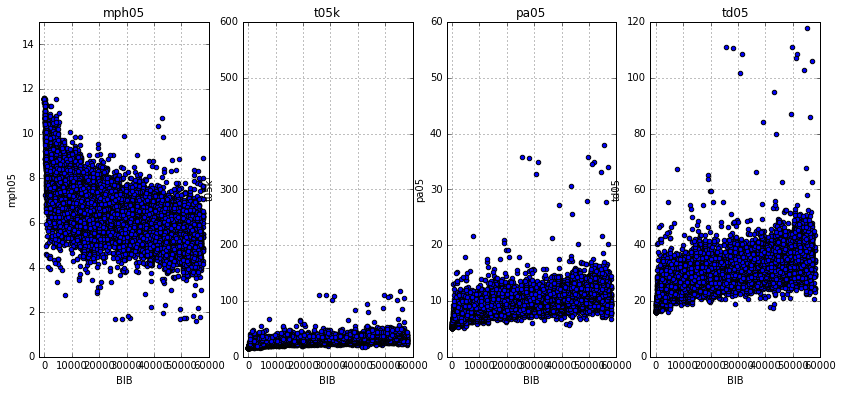

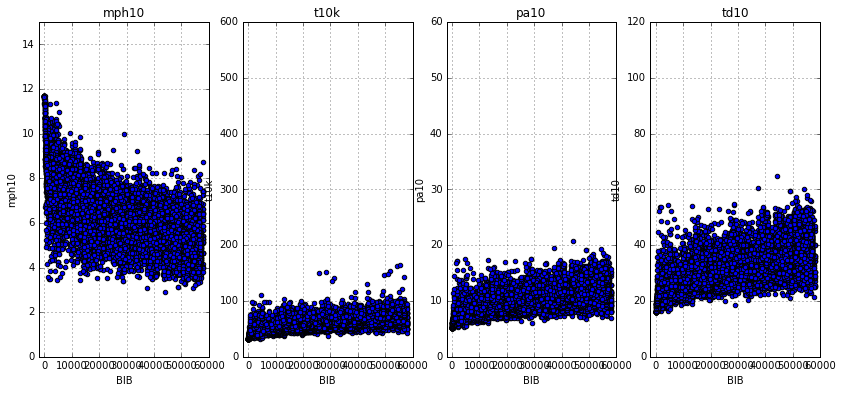

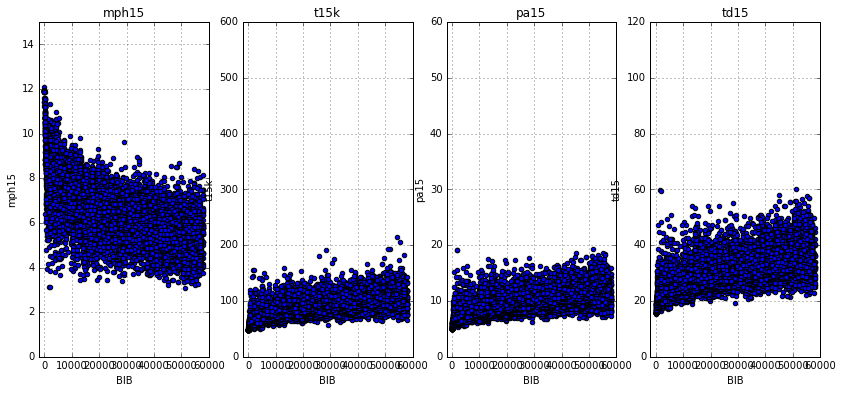

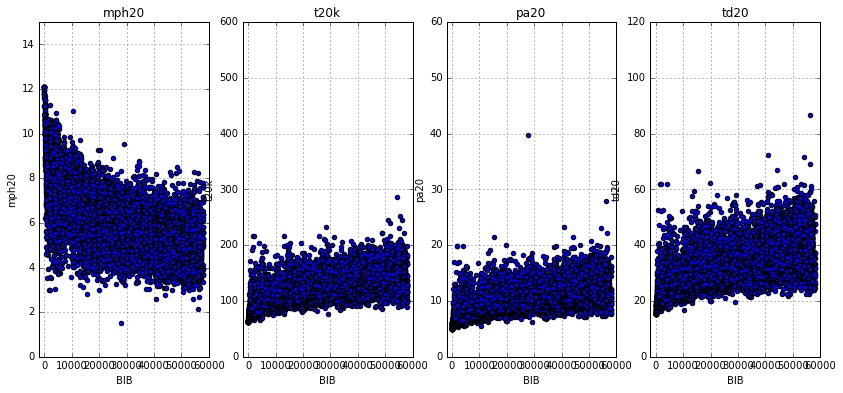

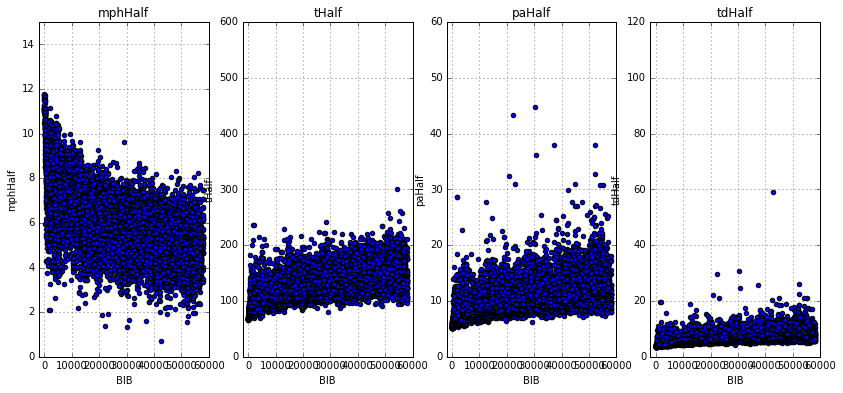

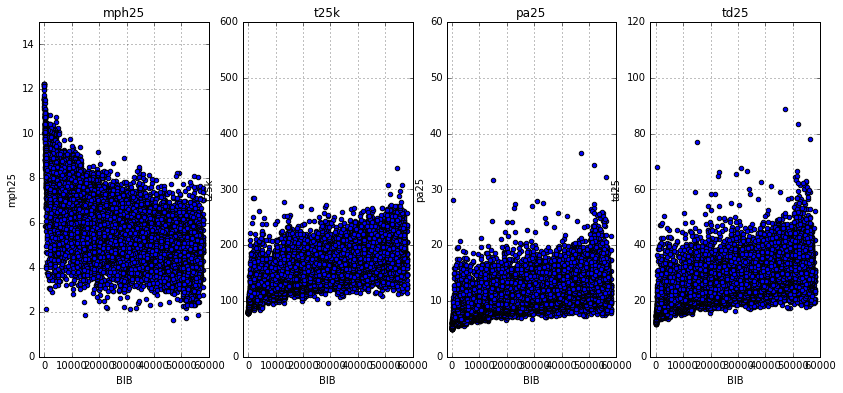

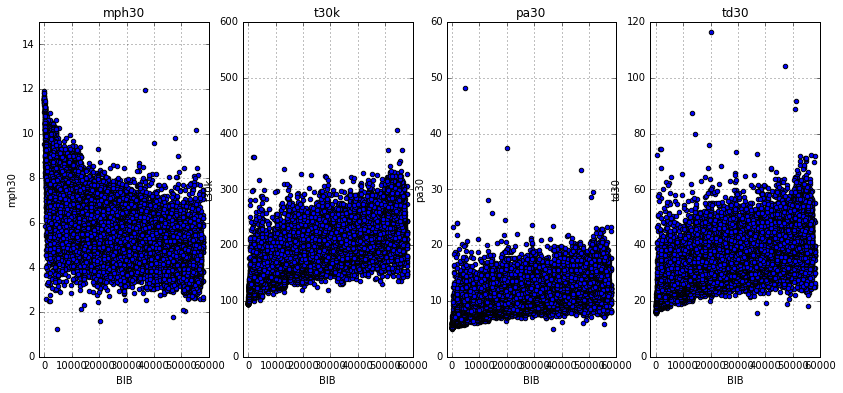

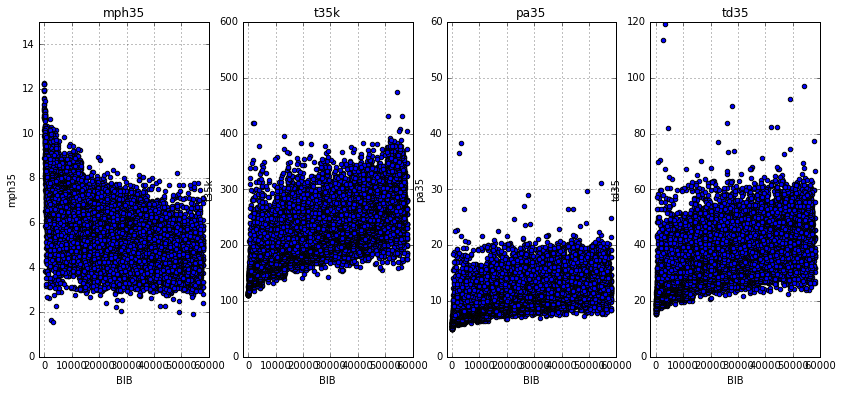

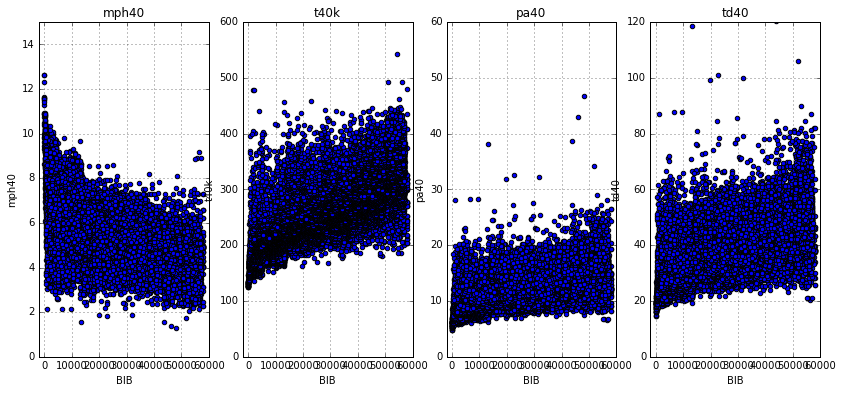

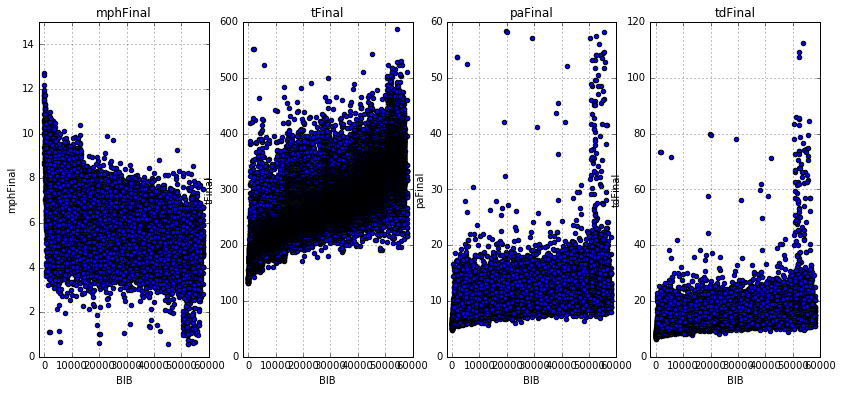

In [14]:

xlimit = [-2000,60000]
for i in range(10):
    fig, (axs0,axs1,axs2,axs3) = plt.subplots(1, 4, sharey=False)
    axs0.set_title(mph_data[i])
    axs1.set_title(t_data[i])
    axs2.set_title(pace_data[i])
    axs3.set_title(tdiff[i])
    rundata.plot(x='BIB', y=mph_data[i],kind='scatter',grid=True,ylim=[0,15],xlim=xlimit,ax=axs0,figsize=(14,6)),
    rundata.plot(x='BIB', y=t_data[i], kind='scatter',grid=True,ylim=[0,600],xlim=xlimit,ax=axs1),
    rundata.plot(x='BIB', y=pace_data[i], kind='scatter',grid=True,ylim=[0,60],xlim=xlimit,ax=axs2),
    rundata.plot(x='BIB', y=tdiff[i], kind='scatter',grid=True,xlim=xlimit,ylim=[0,120],ax=axs3),
    

# Some observations


Runners with BIB numbers >50,000 have the slowest times
This could be becuase they were assigned to the slower runners, or maybe there is a systematic error in for those runners

Let's look at the relation between the time at the half time and the final time. We do not expect a line because I expect runner to get tired as time passes by

### Look at the data by divisions

In [13]:
cols = 'Division'
cats = rundata[cols].dropna().unique()
rcat = rundata[cols]
r2 = pd.get_dummies(rcat)

rundata = rundata.join(r2[cats[0:15]])

In [14]:
cols = 'Gender'
gender = rundata[cols].dropna().unique()
rgen = rundata[cols]
r3 = pd.get_dummies(rgen)
rundata = rundata.join(r3)

In [15]:
rundata.head()

,Place Overall,Place Gender,Place Division,Name (CTZ),"City, State",BIB,Division,Age,HALF,Finish,Gender,start_time,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal,mph05,mph10,mph15,mph20,mphHalf,mph25,mph30,mph35,...,pa30,pa35,pa40,paFinal,td05,td10,td15,td20,tdHalf,td25,td30,td35,td40,tdFinal,30-34,25-29,20-24,40-44,35-39,45-49,50-54,60-64,55-59,16-19,65-69,70-74,75-79,80+,Female,Male
0,1,1,1.0,"» Kirui, Abel (KEN)",NaN,3,30-34,34.0,01:06:51,02:11:23,Male,07:30:03,16.116667,32.066667,47.716667,63.133333,66.85,78.733333,94.950000,110.183333,124.933333,131.383333,11.566400,11.687262,11.911298,12.091578,11.034242,12.235727,11.495076,12.237100,...,5.219626,4.903123,4.747553,4.718292,16.116667,15.950000,15.650000,15.416667,3.716667,11.883333,16.216667,15.233333,14.750000,6.450000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,1.0,"» Chumba, Dickson (KEN)",NaN,1,25-29,29.0,01:06:51,02:11:26,Male,07:30:03,16.116667,32.066667,47.716667,63.150000,66.85,78.733333,94.966667,110.183333,124.933333,131.433333,11.566400,11.687262,11.911298,12.078520,11.083946,12.235727,11.483274,12.250503,...,5.224991,4.897758,4.747553,4.754868,16.116667,15.950000,15.650000,15.433333,3.700000,11.883333,16.233333,15.216667,14.750000,6.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,3,1.0,"» Kipketer, Gideon (KEN)",NaN,7,20-24,23.0,01:06:51,02:12:20,Male,07:30:03,16.116667,32.066667,47.700000,63.116667,66.85,78.733333,94.950000,110.183333,125.333333,132.333333,11.566400,11.687262,11.923997,12.091578,10.984982,12.235727,11.495076,12.237100,...,5.219626,4.903123,4.876300,5.120627,16.116667,15.950000,15.633333,15.416667,3.733333,11.883333,16.216667,15.233333,15.150000,7.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,4,2.0,"» Lonyangata, Paul (KEN)",NaN,6,20-24,24.0,01:06:51,02:13:17,Male,07:30:03,16.116667,32.066667,47.716667,63.150000,66.85,78.733333,94.966667,110.200000,126.266667,133.283333,11.566400,11.687262,11.911298,12.078520,11.083946,12.235727,11.483274,12.237100,...,5.224991,4.903123,5.171346,5.132819,16.116667,15.950000,15.650000,15.433333,3.700000,11.883333,16.233333,15.233333,16.066667,7.016667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,2.0,"» Sambu, Stephen (KEN)",NaN,8,25-29,28.0,01:06:51,02:13:35,Male,07:30:03,16.133333,32.150000,47.733333,63.150000,66.85,78.850000,94.983333,110.583333,126.600000,133.583333,11.554452,11.638615,11.962256,12.091578,11.083946,12.116768,11.554452,11.949476,...,5.192804,5.021141,5.155252,5.108435,16.133333,16.016667,15.583333,15.416667,3.700000,12.000000,16.133333,15.600000,16.016667,6.983333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
cats = ['16-19','20-24','25-29','30-34' ,'35-39', '40-44', '45-49', '50-54',
        '55-59','60-64', '65-69', '70-74', '75-79', '80+']

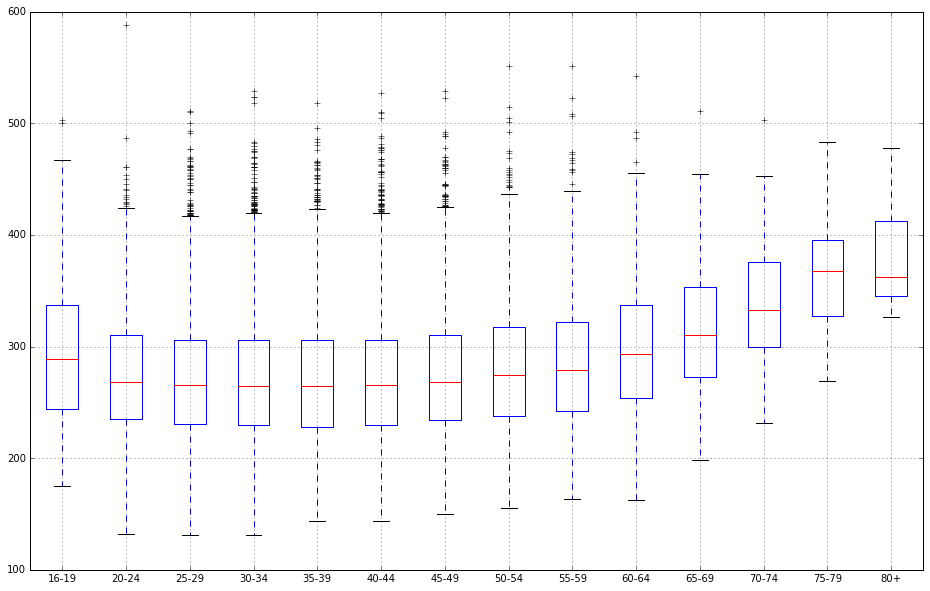

In [22]:
# create the figure
fig = plt.figure(1, figsize=(16, 10))
# Create an axes instance
ax = fig.add_subplot(111)


## combine these different collections into a list 
data_to_plot = []

for i in range(len(cats)):
#for i in range(2):
    data_to_plot.append(rundata[rundata[cats[i]]==1].tFinal)
#    data_to_plot = [rundata[rundata[cats[0]]==1].tFinal, collectn_2, collectn_3, collectn_4]
# Create the boxplot
bp = ax.boxplot(data_to_plot)
#rundata[rundata[cats[0]]==1].tFinal

ax.set_xticklabels(cats)
ax.grid(True)

In [23]:
import seaborn as sns
sns.set(style="darkgrid", palette="Set1")

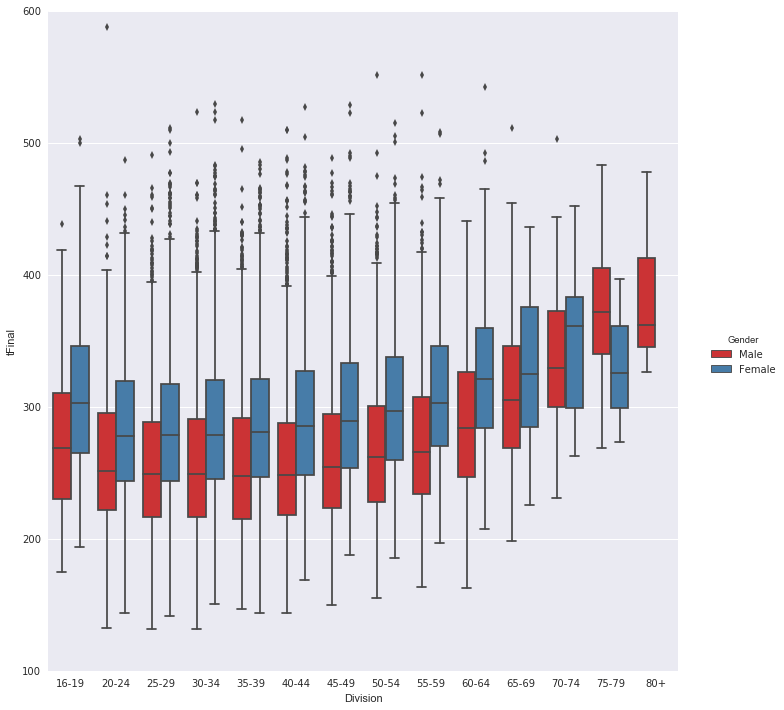

In [161]:
sns.factorplot(y='tFinal',x='Division', hue='Gender',data=rundata,kind='box',aspect=1,size=10,order=cats,margin_titles=True)

In [44]:
## number of runners per division
nrun_cat = []
nfem = []
nmale = []
fem_tot =0
male_tot =0
for i in range(len(cats)):
    nm = len(rundata[(rundata[cats[i]]==1)&(rundata.Male==1)].tFinal)
    nf  = len(rundata[(rundata[cats[i]]==1)&(rundata.Female==1)].tFinal)
    nmale.append(nm)
    nfem.append(nf)
    fem_tot +=nf
    male_tot +=nm
    nrun_cat.append(nf+nm)

total runners   [297, 2794, 6564, 6761, 6527, 6149, 4864, 3279, 1866, 867, 327, 89, 22, 7]  Total  40413
Male runners    [147, 1136, 2908, 3418, 3524, 3471, 2959, 2104, 1302, 638, 257, 74, 19, 7]  Total 21964 (54.3%)
Female runners  [150, 1658, 3656, 3343, 3003, 2678, 1905, 1175, 564, 229, 70, 15, 3, 0]  Total 18449 (45.7%)


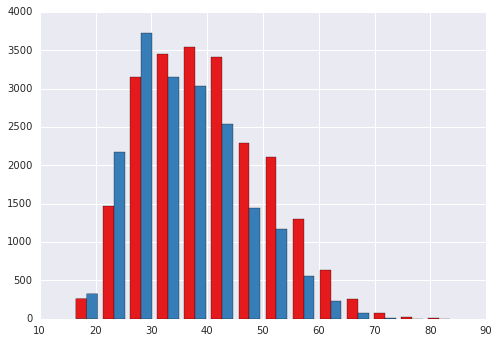

In [160]:
print 'total runners  ', nrun_cat,' Total ',male_tot+fem_tot
print 'Male runners   ',nmale,' Total %d (%1.1f%%)' %(male_tot, 100.*float(male_tot)/(male_tot+fem_tot))
print 'Female runners ',nfem,' Total %d (%1.1f%%)'  %(fem_tot,  100.*float(fem_tot)/(male_tot+fem_tot))

plt.hist([rundata[rundata.Male==1].Age.dropna(),rundata[rundata.Female==1].Age.dropna()],label=['Male','Female'],bins=14)
plt.show()


Age is not that big of a factor for runners with ages between 20 and 50, for older runners, the older the longer it takes to finish the marathon.
There are more male runners than female ones, but not by much
Gender is more an important factor as Male runners finish faster than female runners, for all categories, with the exception of the 75-79 age group.

# Let's look at the final times vs the  times at half the race

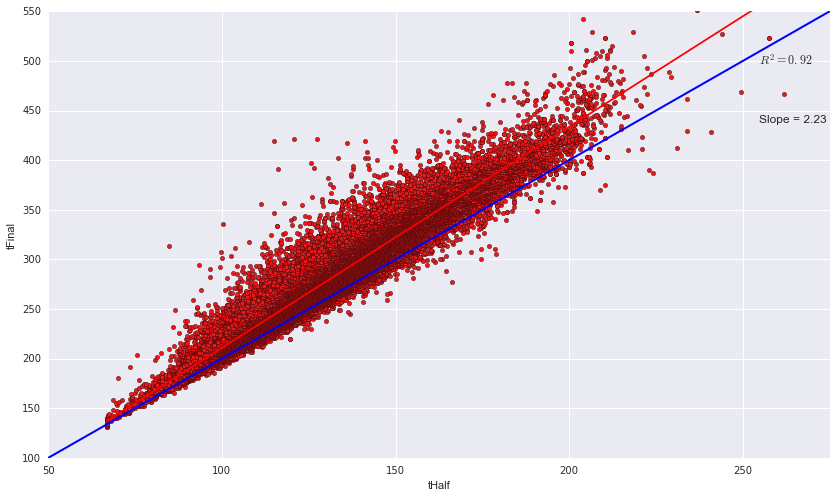

In [59]:
fig, (axs) = plt.subplots(1, 1, sharey=False)

axs.set_title('')
rundata.plot(x='tHalf', y='tFinal',kind='scatter',grid=True,xlim=[50,300],ax=axs,figsize=(14,8)),
#z = np.polyfit(x=rundata.tFinal, y=rundata.tHalf,deg=1)

trendline(rundata.tHalf, rundata.tFinal)
def myline(x):
    y = 2.0*x
    return y

xt = [0,300.]
yt = []
for x in xt:
    y = myline(x)
    yt.append(y)
plt.xlim(50,275)
plt.ylim(100,550)
plt.plot(xt,yt,color='b',linewidth=2)


In [132]:
def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.6 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.2f$' % Rsqr)
        print '$R^2 = %0.4f$' % Rsqr
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.7 * np.max(yd) + 0.2 * np.min(yd),
                 'Slope = %1.2f ' % slope)
        print    'Slope = %1.6f ' % slope
        print   'Intercept = %1.6f' % intercept
    else:
        #Return the R^2 value:
        return Rsqr

In the plot above, the red line is the ideal case where the  tFinal = 2*tHalf. Runners below the redline ran a a slower first half. The majority of the runners ran a slower second half. Let's look at this data in a differnt way

$R^2 = 0.9276$


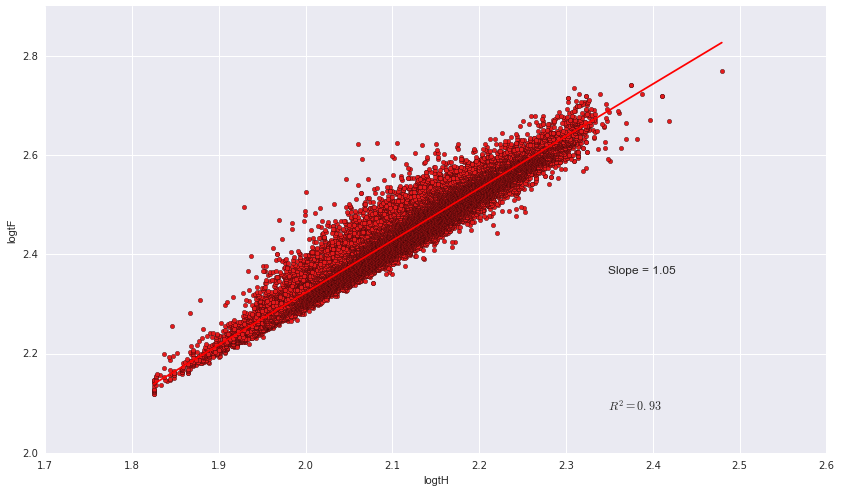

In [104]:
rundata['logtH'] = np.log10(rundata.tHalf)
rundata['logtF'] = np.log10(rundata.tFinal)
fig, (axs) = plt.subplots(1, 1, sharey=False)

axs.set_title('')
rundata.plot(x='logtH', y='logtF',kind='scatter',grid=True,ax=axs,figsize=(14,8)),
trendline(rundata.logtH, rundata.logtF)



Looking wheher runners ran a faster or a slowere half marathon

faster runners: 9.02%


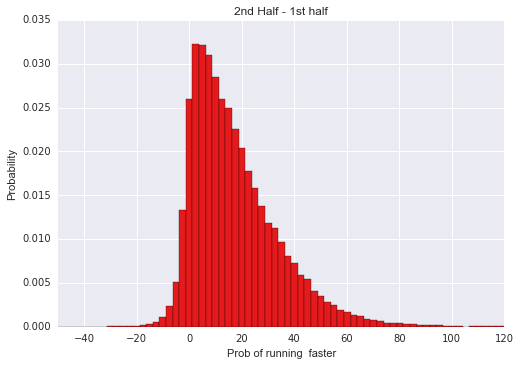

In [64]:
rundata['tHdiff'] = (rundata.tFinal - 2*rundata.tHalf)
plt.hist(rundata.tHdiff, 100, normed=1)

trunners = len(rundata)
frunners = len(rundata[rundata.tHdiff<0.])
print 'faster runners: %1.2f%%' % (100.*float(frunners)/float(trunners))
plt.xlabel('Prob of running  faster')
plt.ylabel('Probability')
plt.title('2nd Half - 1st half')
#plt.Figure(figsize=(14,8))
plt.axis([-50, 120, 0, 0.035])
plt.grid(True)
plt.show()


(<matplotlib.axes._subplots.AxesSubplot at 0x120a2f050>,)

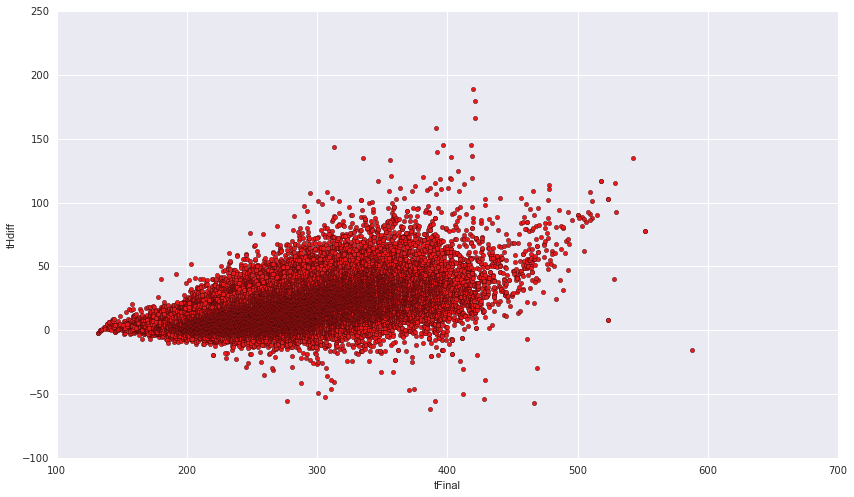

In [69]:
fig, (axs) = plt.subplots(1, 1, sharey=False)

axs.set_title('')
rundata.plot(x='tFinal', y='tHdiff',kind='scatter',grid=True,ax=axs,figsize=(14,8)),

## Split Times
Start looking at how the averages change during the race. We are trying to see if the runners keep an average pace or the pace is constantly slowing.

In [70]:
split = [5,10,15,20,21.1, 25,30,35,40,42.2]

import statsmodels.formula.api as smf
#import seaborn as sns
#sns.set(style="darkgrid", palette="Set1")
#sns.set_style("darkgrid")

For each runner, fit a line throught of the speed (mph) at each split, and calculate the slope. If runners keep the same speed, the slope will be zero. 

In [73]:
# create a matplotlib figure
#plt.figure()
nrunners = len(rundata)
#nrunners = 10
split_grad = []
for nr in range(0,nrunners):
    yval = []
    #print 'r %d ' %nr,
    for elem in mph_data:
        #print nr,
        #print elem,
        #print rundata[elem].iloc[nr]
        #print 'runner %d element %s - %1.3f ' %(nr, elem,rundata[elem].iloc[nr])
        yval.append(rundata[elem].iloc[nr])
    d = {'mph': yval, 'split' : split}
    rd = pd.DataFrame(d)
    z = np.polyfit(x=rd.split, y=rd.mph,deg=1)
    split_grad.append(z[0])
    del yval
    


In [76]:
#split_grad
rundata['split'] = split_grad
#rundata.head()

(<matplotlib.axes._subplots.AxesSubplot at 0x11b1b67d0>,)

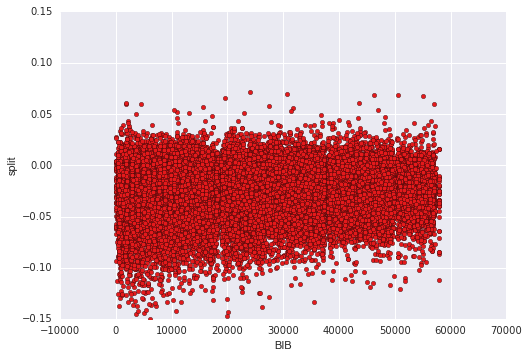

In [78]:
rundata.plot(x='BIB', y='split',kind='scatter',grid=True,ylim=[-0.15,0.15]),

The majority of the runners tend to runner slower as time goes by, there are a few runners that in average increase there speed through the race. lets look at these runners and see how ther place in their category.

In [79]:
# create a matplotlib figure
#plt.figure()
split_1st = [5,10,15,20,21.1]
mph_1st =['mph05','mph10','mph15','mph20','mphHalf']
nrunners = len(rundata)

split_grad_1st = []
for nr in range(0,nrunners):
    yval = []
    #print 'r %d ' %nr,
    for i in range(len(split_1st)):
        #print 'runner %d element %s - %1.3f ' %(nr, mph_data[i],rundata[mph_data[i]].iloc[nr])
        yval.append(rundata[mph_1st[i]].iloc[nr])
    d = {'mph': yval, 'split' : split_1st}
    rd = pd.DataFrame(d)
    rd.head()
    z = np.polyfit(x=rd.split, y=rd.mph,deg=1)
    split_grad_1st.append(z[0])
    del yval
#split_grad_1st 



In [84]:
# create a matplotlib figure
#plt.figure()
split_2nd = [25,30,35,40,42.2]
mph_2nd =['mph25','mph30','mph35','mph40','mphFinal']
nrunners = len(rundata)
#nrunners = 500
lines = []
split_grad_2nd = []
for nr in range(0,nrunners):
    yval = []
    #print 'r %d ' %nr,
    for i in range(len(split_2nd)):
#       print 'runner %d element %s - %1.3f ' %(nr, mph_2nd[i],rundata[mph_2nd[i]].iloc[nr])
        yval.append(rundata[mph_2nd[i]].iloc[nr])
    d = {'mph': yval, 'split' : split_2nd}
    rd = pd.DataFrame(d)
    rd.head()
    z = np.polyfit(x=rd.split, y=rd.mph,deg=1)
    split_grad_2nd.append(z[0])
    lines.append(yval)
    del yval

In [87]:
rundata['split_h1'] = split_grad_1st
rundata['split_h2'] = split_grad_2nd

(<matplotlib.axes._subplots.AxesSubplot at 0x11c7795d0>,)

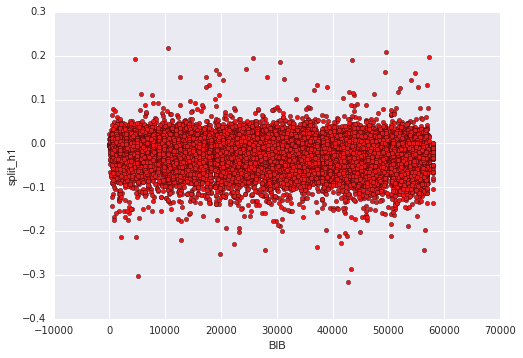

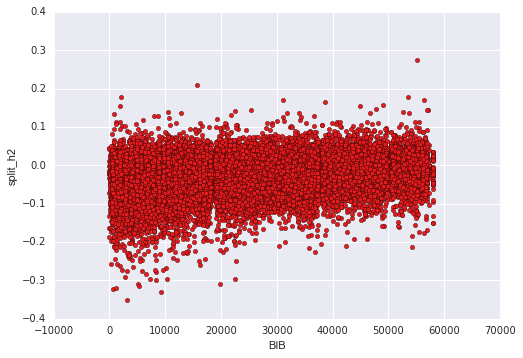

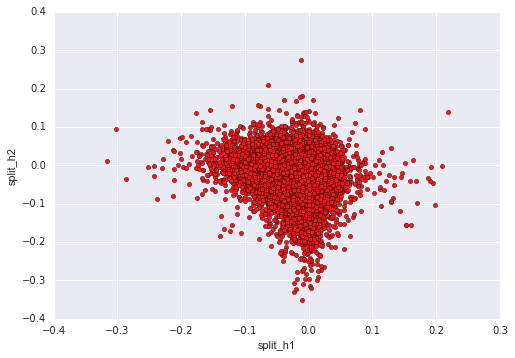

In [92]:
rundata.plot(x='BIB', y='split_h1',kind='scatter',grid=True),
rundata.plot(x='BIB', y='split_h2',kind='scatter',grid=True),
rundata.plot(x='split_h1', y='split_h2',kind='scatter',grid=True),

# Lets take the top 10 % of the runners and try to fit their data

In [94]:
rfast = rundata.copy()
rmft0 = pd.DataFrame()
frac = 0.1
cat_lo = 1
cat_hi = 8
for i in range(cat_lo,cat_hi):
    #print cats[i]
    if i == cat_lo:
        rmft0 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']<(nmale[i]*frac)) & (rfast['Male']==1)]
        #print ' adding %d male runners' %(nmale[i]*frac)
    else:
        rmft1 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']<(nmale[i]*frac)) & (rfast['Male']==1)]
        #print ' adding %d male runners' %(nmale[i]*frac)
        rmft0 = pd.concat([rmft0,rmft1]) 
        
rfft0 = pd.DataFrame()

for i in range(cat_lo, cat_hi):
    #print cats[i]
    if i == cat_lo:
        rfft0 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']<(nfem[i]*frac)) & (rfast['Male']==0)]
        #print ' adding %d female runners' %(nfem[i]*frac)
    else:
        rfft1 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']<(nfem[i]*frac)) & (rfast['Male']==0)]
        #print ' adding %d female runners' %(nfem[i]*frac)
        rfft0 = pd.concat([rfft0,rfft1]) 

rmale_fast = rmft0.copy()
rfemale_fast  = rfft0.copy()
rtop10 = pd.concat([rmale_fast, rfemale_fast])

$R^2 = 0.9367$
Slope = 1.912082 
Intercept = 12.191573


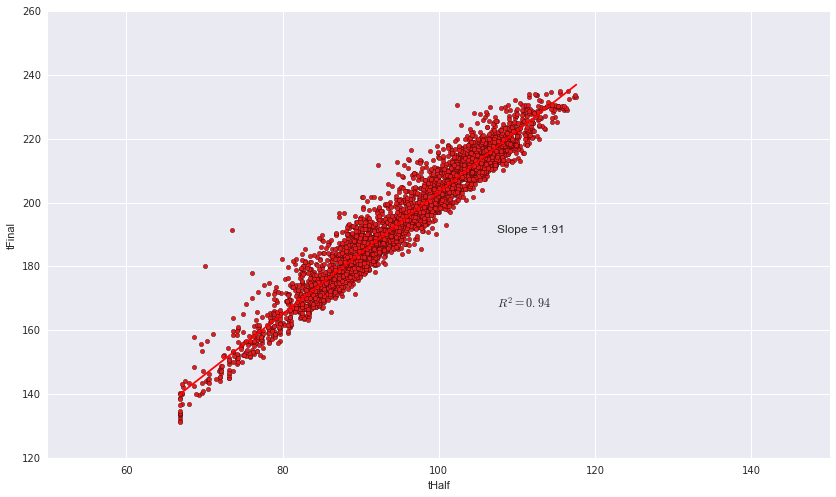

In [133]:
fig, (axs) = plt.subplots(1, 1, sharey=False)

axs.set_title('')
rtop10.plot(x='tHalf', y='tFinal',kind='scatter',grid=True,xlim=[50,150],ax=axs,figsize=(14,8)),
#z = np.polyfit(x=rundata.tFinal, y=rundata.tHalf,deg=1)
trendline(rtop10.tHalf, rtop10.tFinal)



$R^2 = 0.9372$
Slope = 0.937406 
Intercept = 0.433513


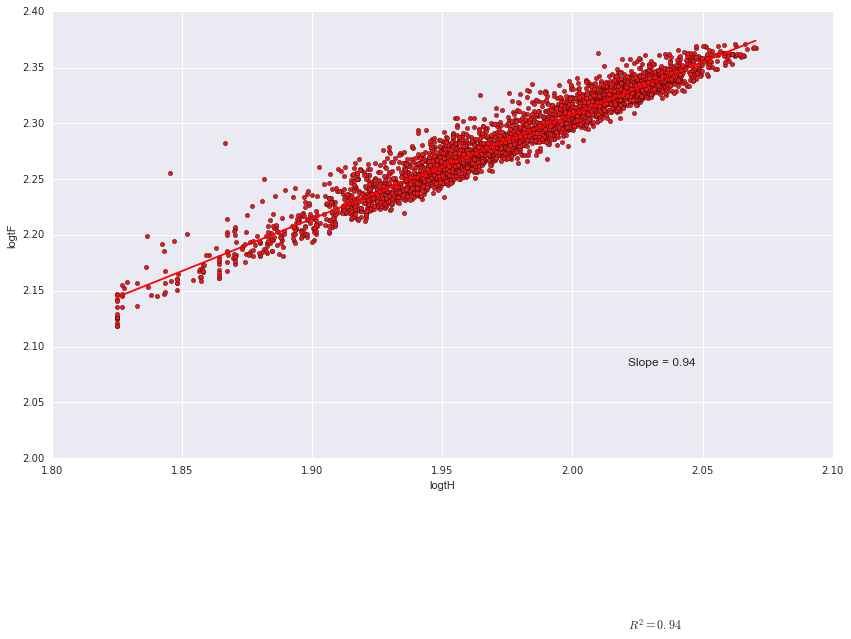

In [148]:
fig, (axs) = plt.subplots(1, 1, sharey=False)

axs.set_title('')
rtop10.plot(x='logtH', y='logtF',kind='scatter',grid=True,xlim=[1.8,2.1],ylim=[2,2.4],ax=axs,figsize=(14,8)),
#rundata.plot(x='logtH', y='logtF',kind='scatter',grid=True,xlim=[50,300],ax=axs,figsize=(14,8)),
trendline(rtop10.logtH, rtop10.logtF)


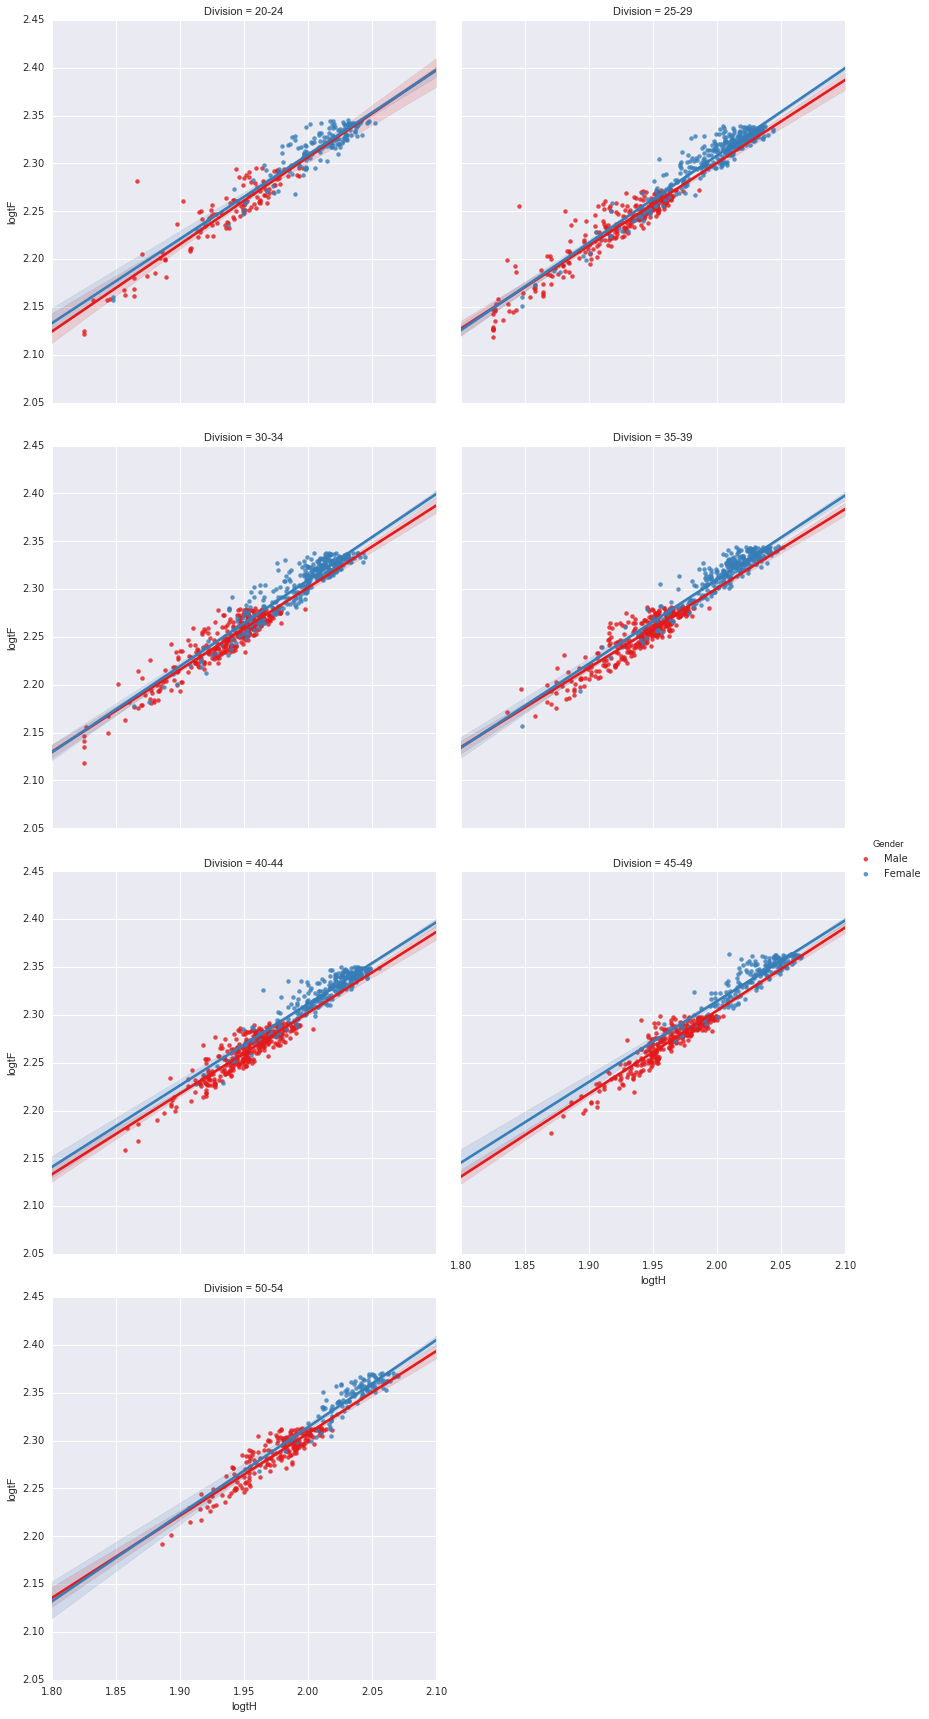

In [314]:
sns.lmplot(x='logtH', y='logtF',hue='Gender', col='Division',data =rtop10,col_wrap=2, size=6)

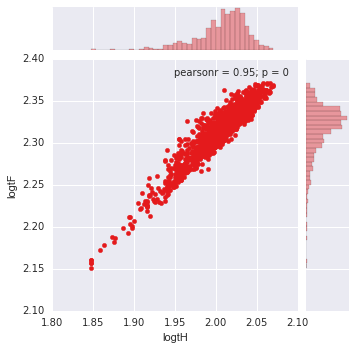

In [319]:
sns.jointplot(x='logtH', y='logtF',data =rtop10[rtop10.Male==0], size=5)

# Prediction

Let's try to predict the Finishing time based on times at 10 km, 20, 30, age and gender, lets do it for the top 10% runners

In [113]:
from sklearn import cross_validation
from sklearn import linear_model, metrics

In [164]:
y = pd.DataFrame(rtop10.tFinal)
y.head()
modeldata = pd.DataFrame(rtop10.Male)
modeldata.head()
# variables to fit
fit_cols = ['Age','t10k','t20k','t30k']
for elem in fit_cols:
    modeldata= modeldata.join(rtop10[elem])
for elem in cats[1:8]:
    modeldata= modeldata.join(rtop10[elem])
print fit_cols

['Age', 't10k', 't20k', 't30k']


In [165]:
modeldata.head()
#y.head()

,Male,Age,t10k,t20k,t30k,20-24,25-29,30-34,35-39,40-44,45-49,50-54
2,1.0,23.0,32.066667,63.116667,94.950000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,24.0,32.066667,63.150000,94.966667,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1.0,20.0,32.300000,64.500000,96.933333,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26,1.0,24.0,33.016667,66.050000,100.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28,1.0,24.0,33.050000,66.400000,100.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
#shuffle takes random data
modeldata.shape
# kf basically contains 5 different test train sets of 80% and 20% split
#for a in kf:
#    print a
#    print a[0].shape , a[1].shape

(3681, 18)

In [115]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
# I know kf has to variables, so I will loop over both, and name them train_indesx and test_index
for train_index, test_index in kf:
    #fit a line with the train set as X and the y's for the train set
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    
    # find the mean square of  the residuals applying the model to the test_set
    #the test set is not in the train set
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    # and get the R square
    scores.append(lm.score(modeldata.iloc[test_index], y.iloc[test_index]))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]

#and get the average of the mean sq and the R2
print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)



~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 9.90001234789
R2: 0.971306302971
Model 2
MSE: 8.73679635281
R2: 0.974200499697
Model 3
MSE: 6.62921563886
R2: 0.981246077025
Model 4
MSE: 7.54444720612
R2: 0.979876690409
Model 5
MSE: 6.49209903746
R2: 0.982922850758
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 7.86051411663
Mean of R2 for all folds: 0.977910484172


In [167]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='mean_squared_error',cv=kf) # 'r2' for R sqaure, or you can define a function

gs.fit(modeldata, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=3681, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [169]:
print modeldata.columns,
gs.best_estimator_.fit(modeldata,y).coef_
gs.best_score_

Index([u'Male', u'Age', u't10k', u't20k', u't30k', u'20-24', u'25-29',
       u'30-34', u'35-39', u'40-44', u'45-49', u'50-54'],
      dtype='object')

-7.8609474065919338

In [170]:
rtop10['timepred'] = gs.predict(modeldata)
rtop10.head()

,Place Overall,Place Gender,Place Division,Name (CTZ),"City, State",BIB,Division,Age,HALF,Finish,Gender,start_time,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal,mph05,mph10,mph15,mph20,mphHalf,mph25,mph30,mph35,...,td40,tdFinal,30-34,25-29,20-24,40-44,35-39,45-49,50-54,60-64,55-59,16-19,65-69,70-74,75-79,80+,Female,Male,logtH,logtF,tHdiff,split,split_h1,split_h2,timepred,pred_diff,line_pred,exp_pred,lpred_diff,epred_diff
2,3,3,1.0,"» Kipketer, Gideon (KEN)",NaN,7,20-24,23.0,01:06:51,02:12:20,Male,07:30:03,16.116667,32.066667,47.700000,63.116667,66.850000,78.733333,94.950000,110.183333,125.333333,132.333333,11.566400,11.687262,11.923997,12.091578,10.984982,12.235727,11.495076,12.237100,...,15.150000,7.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.825101,2.121669,-1.366667,0.011373,-0.006493,-0.001756,138.859104,-6.525771,140.014255,139.435710,-7.680921,-7.102377
3,4,4,2.0,"» Lonyangata, Paul (KEN)",NaN,6,20-24,24.0,01:06:51,02:13:17,Male,07:30:03,16.116667,32.066667,47.716667,63.150000,66.850000,78.733333,94.966667,110.200000,126.266667,133.283333,11.566400,11.687262,11.911298,12.078520,11.083946,12.235727,11.483274,12.237100,...,16.066667,7.016667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.825101,2.124776,-0.416667,0.003049,-0.003259,-0.022063,138.769373,-5.486039,140.014255,139.435710,-6.730921,-6.152377
25,27,26,3.0,"» Mcmillan, Connor (USA)","Provo, UT",28,20-24,20.0,01:08:01,02:23:28,Male,07:30:03,16.150000,32.300000,48.350000,64.500000,68.016667,80.666667,96.933333,114.483333,134.033333,143.466667,11.542528,11.542528,11.614444,11.542528,11.661782,11.494168,11.459743,10.621756,...,19.550000,9.433333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.832615,2.156751,7.433333,-0.066636,0.004760,-0.164530,141.167229,2.299437,142.245017,141.715587,1.221650,1.751080
26,29,27,4.0,"» Morrison, Travis (USA)","Hoffman Estates, IL",2049,20-24,24.0,01:09:44,02:23:30,Male,07:30:03,16.566667,33.016667,49.500000,66.050000,69.733333,83.133333,100.166667,117.650000,135.683333,143.500000,11.252223,11.332026,11.309109,11.263554,11.134100,10.850837,10.943943,10.662259,...,18.033333,7.816667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.843440,2.156852,4.033333,-0.026703,-0.005645,-0.030715,146.813867,-3.313867,145.527424,145.065826,-2.027424,-1.565826
28,32,29,5.0,"» Eustance, Tyler (USA)","Binghamton, NY",308,20-24,24.0,01:10:08,02:24:07,Male,07:30:03,16.583333,33.050000,49.666667,66.400000,70.133333,83.383333,100.333333,117.833333,136.116667,144.116667,11.240914,11.320556,11.218364,11.140149,10.984982,10.973677,10.997748,10.652104,...,18.283333,8.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.845924,2.158714,3.850000,-0.029538,-0.014644,-0.050968,146.343801,-2.227135,146.292257,145.845718,-2.175591,-1.729052


In [171]:
print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
#print gs.grid_scores_

BEST ESTIMATOR
7.86094740659
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
ALL ESTIMATORS


$R^2 = 0.9783$
Slope = 0.978282 
Intercept = 4.201198


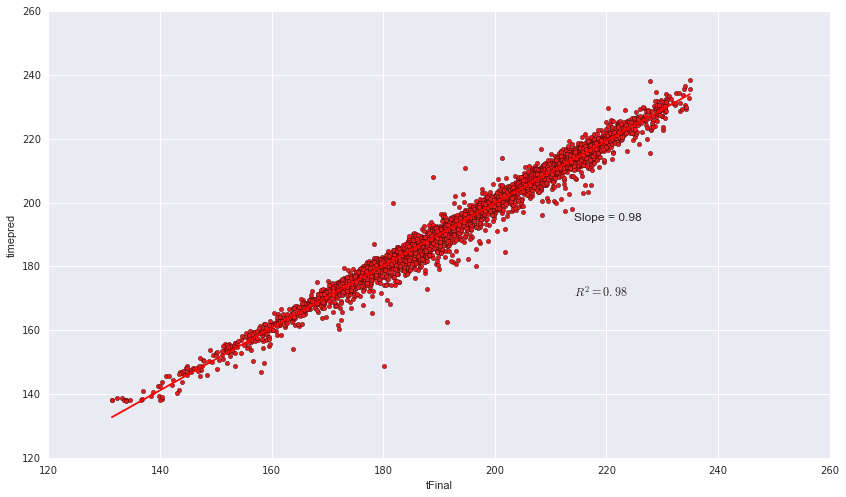

In [172]:
rtop10.plot(x='tFinal', y='timepred',kind='scatter',grid=True,figsize=(14,8)),
trendline(rtop10.tFinal, rtop10.timepred)

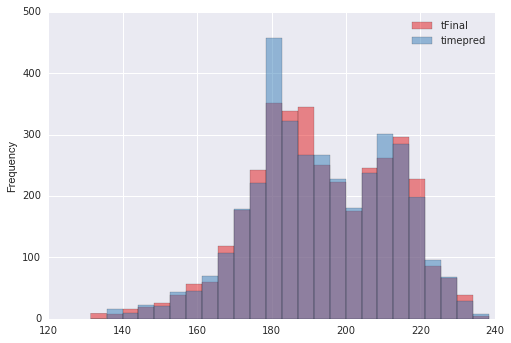

In [126]:
#rtop10_2 = rtop10(['tHalf','timepred'])
pcols = ['tFinal','timepred']
rtop10[pcols].plot.hist(alpha = 0.5,bins=25)

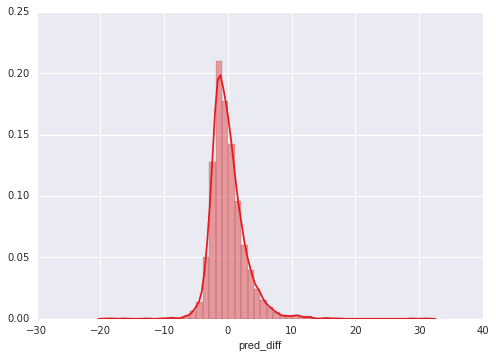

In [131]:
rtop10['pred_diff']=rtop10.tFinal - rtop10.timepred
#rtop10['pred_diff'].plot.hist(alpha = 0.5,bins=25)
sns.distplot(rtop10['pred_diff']);

In [149]:
#$R^2 = 0.9367$
#fittin ith a line
def predict_line_time(x):
    Slope = 1.912082 
    Intercept = 12.191573
    tfinal = x*Slope + Intercept
    return tfinal

def predict_exp_time(x):
    Slope = 0.937406 
    Intercept = 0.433513
    
    tfinal = np.log10(x)*Slope + Intercept
    return np.power(10,tfinal)

In [152]:
rtop10['line_pred'] = predict_line_time(rtop10.tHalf)
rtop10['exp_pred'] = predict_exp_time(rtop10.tHalf)

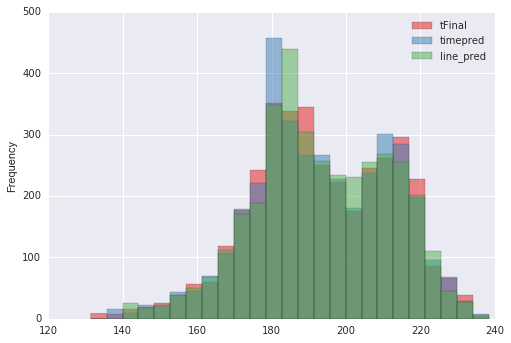

In [156]:
pcols = ['tFinal','timepred','line_pred']
rtop10[pcols].plot.hist(alpha = 0.5,bins=25)

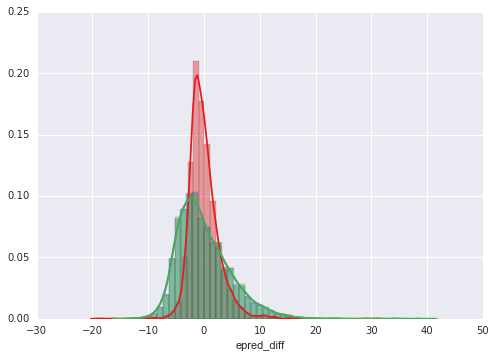

In [154]:
rtop10['lpred_diff']=rtop10.tFinal - rtop10.line_pred
rtop10['epred_diff']=rtop10.tFinal - rtop10.exp_pred

#rtop10['pred_diff'].plot.hist(alpha = 0.5,bins=25)
sns.distplot(rtop10['pred_diff']);
sns.distplot(rtop10['lpred_diff']);
sns.distplot(rtop10['epred_diff']);

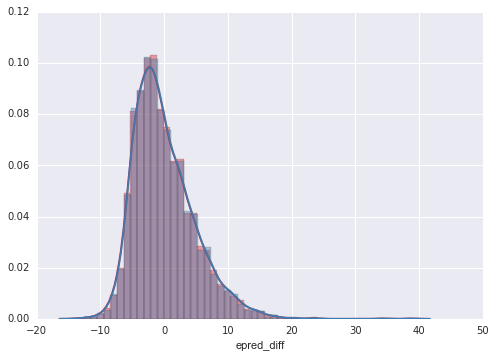

In [173]:
rfast = rundata.copy()
rmft0 = pd.DataFrame()
frac = 0.1
cat_lo = 1
cat_hi = 8
for i in range(cat_lo,cat_hi):
    #print cats[i]
    if i == cat_lo:
        rmft0 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']>(nmale[i]*frac))& (rfast['Place Division']<(nmale[i]*frac*2)) & (rfast['Male']==1)]
        #print ' adding %d male runners' %(nmale[i]*frac)
    else:
        rmft1 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']>(nmale[i]*frac))& (rfast['Place Division']<(nmale[i]*frac*2)) & (rfast['Male']==1)]
        #print ' adding %d male runners' %(nmale[i]*frac)
        rmft0 = pd.concat([rmft0,rmft1]) 
        
rfft0 = pd.DataFrame()

for i in range(cat_lo, cat_hi):
    #print cats[i]
    if i == cat_lo:
        rfft0 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']>(nfem[i]*frac)) & (rfast['Place Division']<(nfem[i]*frac*2)) & (rfast['Male']==0)]
        #print ' adding %d female runners' %(nfem[i]*frac)
    else:
        rfft1 = rfast[ (rfast[cats[i]]==1) & (rfast['Place Division']>(nfem[i]*frac)) & (rfast['Place Division']<(nfem[i]*frac)*2) & (rfast['Male']==0)]
        #print ' adding %d female runners' %(nfem[i]*frac)
        rfft0 = pd.concat([rfft0,rfft1]) 

rmale_fast = rmft0.copy()
rfemale_fast  = rfft0.copy()
rtop20 = pd.concat([rmale_fast, rfemale_fast])

In [174]:
rtop20.describe()

,Place Overall,Place Gender,Place Division,BIB,Age,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal,mph05,mph10,mph15,mph20,mphHalf,mph25,mph30,mph35,mph40,mphFinal,pa05,pa10,pa15,pa20,paHalf,...,td15,td20,tdHalf,td25,td30,td35,td40,tdFinal,30-34,25-29,20-24,40-44,35-39,45-49,50-54,60-64,55-59,16-19,65-69,70-74,75-79,80+,Female,Male,logtH,logtF,tHdiff,split,split_h1,split_h2
count,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,...,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.0,3688.0,3688.0,3688.0,3688.0,3688.0,3688.0,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000
mean,6600.473427,2864.254881,436.702007,12518.162419,36.666215,24.882384,49.735733,74.492191,99.538485,105.058464,125.002671,150.433144,177.185552,205.278647,216.861596,7.545706,7.552202,7.579432,7.493244,7.483302,7.339794,7.380574,7.020803,6.692816,7.149600,8.008843,7.999498,7.968312,8.061601,8.075930,...,24.756458,25.046294,5.519979,19.944206,25.430473,26.752409,28.093095,11.582949,0.182755,0.178145,0.075922,0.166486,0.176247,0.131779,0.088666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471529,0.528471,2.020016,2.335079,6.744667,-0.019265,-0.003984,-0.027127
std,3484.947215,791.650965,138.536292,8912.224836,8.717457,2.101117,4.096717,6.038271,8.017143,8.451438,9.953392,11.765712,13.435903,14.898720,15.456612,0.642767,0.629594,0.617821,0.619413,0.633769,0.604145,0.609748,0.603729,0.617885,0.691928,0.676282,0.660566,0.642369,0.660609,0.690634,...,1.995752,2.052423,0.472055,1.636922,2.107087,2.359507,2.632083,1.166143,0.386518,0.382687,0.264909,0.372567,0.381082,0.338296,0.284300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499256,0.499256,0.035144,0.030968,7.033394,0.022642,0.018295,0.042428
min,1522.000000,1363.000000,114.000000,511.000000,20.000000,18.016667,35.533333,53.400000,71.633333,75.600000,89.900000,109.066667,142.116667,176.183333,187.450000,5.413702,5.735748,5.880499,5.946151,4.417659,5.514585,5.564532,3.779895,3.748227,3.700205,5.798988,5.638054,5.750708,5.868727,5.803378,...,17.866667,18.233333,3.966667,14.300000,19.166667,21.383333,21.100000,8.216667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.878522,2.272885,-17.966667,-0.144471,-0.131848,-0.310241
25%,3453.750000,2249.750000,344.750000,6116.750000,29.000000,23.266667,46.566667,69.645833,93.058333,98.183333,116.783333,140.545833,165.450000,192.295833,203.466667,7.029987,7.038835,7.047706,6.959993,6.950949,6.805049,6.857578,6.556102,6.248441,6.704730,7.488795,7.482090,7.444539,7.531711,7.510253,...,23.129167,23.400000,5.133333,18.550000,23.666667,24.816667,26.112500,10.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.992038,2.308493,1.829167,-0.032114,-0.013407,-0.047432
50%,5784.000000,2814.000000,438.000000,10535.500000,36.000000,24.783333,49.533333,74.208333,98.950000,104.400000,124.275000,149.450000,175.641667,203.441667,215.416667,7.521661,7.526722,7.567462,7.491433,7.456473,7.337320,7.377777,6.973011,6.633873,7.111665,7.976962,7.971597,7.928682,8.009149,8.046700,...,24.633333,24.883333,5.500000,19.816667,25.266667,26.733333,28.100000,11.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,2.018700,2.333279,5.683333,-0.016524,-0.003175,-0.021557
75%,9757.500000,3356.250000,541.250000,16755.750000,44.000000,26.516667,53.000000,79.483333,106.300000,112.170833,133.520833,160.650000,189.450000,219.316667,231.283333,8.011969,8.019151,8.059

In [175]:
modeldata2 = pd.DataFrame(rtop20.Male)
modeldata2.head()
# variables to fit
fit_cols = ['Age','t10k','t20k','t30k']
for elem in fit_cols:
    modeldata2 = modeldata2.join(rtop20[elem])
for elem in cats[1:8]:
    modeldata2 = modeldata2.join(rtop20[elem])
print fit_cols

['Age', 't10k', 't20k', 't30k']


In [176]:
rtop20['timepred'] = gs.predict(modeldata2)
rtop20.head()

,Place Overall,Place Gender,Place Division,Name (CTZ),"City, State",BIB,Division,Age,HALF,Finish,Gender,start_time,t05k,t10k,t15k,t20k,tHalf,t25k,t30k,t35k,t40k,tFinal,mph05,mph10,mph15,mph20,mphHalf,mph25,mph30,mph35,...,td20,tdHalf,td25,td30,td35,td40,tdFinal,30-34,25-29,20-24,40-44,35-39,45-49,50-54,60-64,55-59,16-19,65-69,70-74,75-79,80+,Female,Male,logtH,logtF,tHdiff,split,split_h1,split_h2,timepred
2332,2673,2333,114.0,"» Porcarelli, Francesco (USA)","Catonsville, MD",3799,20-24,21.0,01:31:05,03:17:55,Male,07:34:56,22.266667,43.983333,65.083333,86.383333,91.083333,108.333333,130.433333,154.383333,186.050000,197.916667,8.371788,8.583814,8.834683,8.751729,8.725660,8.429056,8.434924,7.783375,...,21.300000,4.700000,17.250000,22.100000,23.950000,31.666667,11.866667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.959439,2.296482,15.750000,-0.057628,0.022246,-0.131303,188.451160
2348,2698,2349,115.0,"» King, Matthew (USA)","New Lenox, IL",9576,20-24,24.0,01:38:04,03:18:02,Male,07:35:23,23.466667,47.150000,69.733333,92.883333,98.066667,116.150000,139.166667,163.050000,187.750000,198.033333,7.943686,7.871013,8.254398,8.052346,7.912013,8.040620,8.098993,7.805101,...,23.150000,5.183333,18.083333,23.016667,23.883333,24.700000,10.283333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.991521,2.296738,1.900000,-0.005968,0.005208,-0.018154,198.496453
2355,2710,2356,116.0,"» Danke, Thomas (CHI)",Santiago,21896,20-24,24.0,01:39:55,03:18:08,Male,08:01:58,25.000000,50.000000,72.616667,94.950000,99.916667,117.383333,139.866667,162.766667,187.600000,198.133333,7.456473,7.456473,8.242232,8.346798,8.257168,8.324497,8.291111,8.140254,...,22.333333,4.966667,17.466667,22.483333,22.900000,24.833333,10.533333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.999638,2.296958,-1.700000,0.003928,0.061182,-0.043317,197.066196
2392,2752,2393,117.0,"» Nosti, Jose (MEX)","Mexico City, Estado ...",12277,20-24,24.0,01:37:04,03:18:23,Male,07:33:54,22.983333,46.283333,69.333333,92.100000,97.066667,115.466667,138.950000,163.300000,188.166667,198.383333,8.110739,8.000507,8.087281,8.187928,8.257168,7.902240,7.938048,7.655516,...,22.766667,4.966667,18.400000,23.483333,24.350000,24.866667,10.216667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.987070,2.297505,4.250000,-0.011436,0.010319,-0.007870,199.360053
2397,2757,2398,118.0,"» Kelly, Eoghan (USA)","Cambridge, MA",2000,20-24,24.0,01:34:03,03:18:25,Male,07:39:41,22.933333,44.866667,66.766667,88.983333,94.050000,112.016667,135.733333,160.433333,186.933333,198.416667,8.128422,8.499019,8.511955,8.390630,8.094197,8.092832,7.859950,7.547037,...,22.216667,5.066667,17.966667,23.716667,24.700000,26.500000,11.483333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.973359,2.297578,10.316667,-0.037270,0.000083,-0.062565,197.456805


$R^2 = 0.9430$
Slope = 1.026315 
Intercept = -7.539445


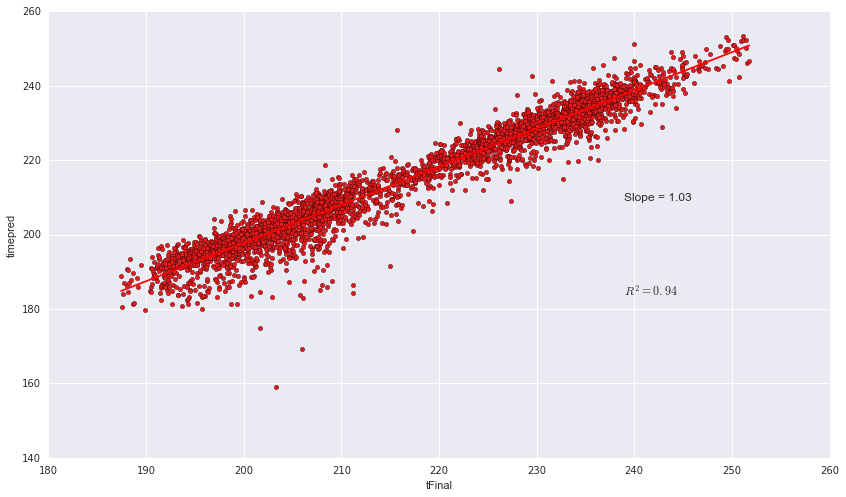

In [177]:
rtop20.plot(x='tFinal', y='timepred',kind='scatter',grid=True,figsize=(14,8)),
trendline(rtop20.tFinal, rtop20.timepred)

In [183]:
modeldata3 = pd.DataFrame(rundata.dropna().Male)
modeldata3.head()
# variables to fit
fit_cols = ['Age','t10k','t20k','t30k']
for elem in fit_cols:
    modeldata3 = modeldata3.join(rundata[elem].dropna())
for elem in cats[1:8]:
    modeldata3 = modeldata3.join(rundata[elem].dropna())
print fit_cols

['Age', 't10k', 't20k', 't30k']


In [187]:
rpred = rundata.dropna()
rpred['timepred'] = gs.predict(modeldata3)
#rundata.head()

/Users/angelmanzur/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


$R^2 = 0.9753$
Slope = 0.998613 
Intercept = -2.806552


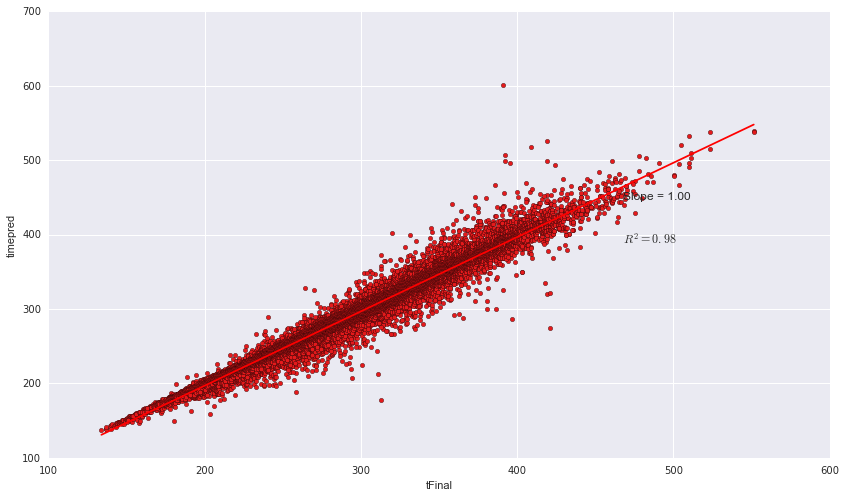

In [188]:
rpred.plot(x='tFinal', y='timepred',kind='scatter',grid=True,figsize=(14,8)),
trendline(rpred.tFinal, rpred.timepred)